# 15.5 Homework

- Write a code to solve the minimum of 2D function with Monte Carlo method
- Write a code to solve the minimum of 2D function using the gradient descent method with variable stepsize. 

### Minimization- Monte Carlo Method: 

- Find the minimum value of the following function using the Monte Carlo Method:

$$ f(x,y)= \frac{x^2}{2} + \frac{y^2}{4} $$

In order to find the minimum of a function using the Monte Carlo method, generate *N* number of random numbers for x and y, within a specific range: x min, x max, and y min y max. Once the random rumbers are generated, pass these values through the function $f(x,y)$ and determine the corresponding function value. When *N* number of function values are calculated, observe which random values of x and y give the lowest function value. This would be the minimum x and y of the function. In theory, a larger *N* value would indicate a more accurate result. 

Minimum at x: 0.15616459602424992 and y: -0.21729997019634206
Minimum function value: 0.023998509787541374


<IPython.core.display.Javascript object>


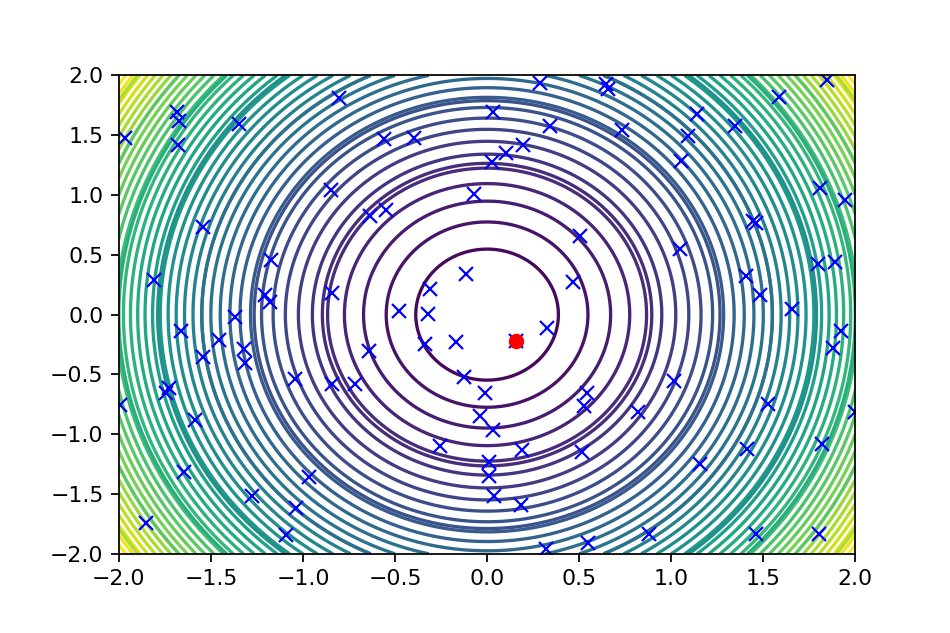

In [100]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = -2, 2                          # range of x
y_min, y_max = -2, 2                          # range of x

def f1(x,y):
    return 1/2*x**2 + 1/4*y**2              #define function 

def minimizeMC(N):

    x0 = x_min+np.random.random()*(x_max-x_min) #find initial value of x
    y0 = y_min+np.random.random()*(y_max-y_min) #find initial value of y
     
    x_list=[] #create list to store x values
    y_list=[] #create list to store y values
    fxy_list=[] #create list to store f(x,y) values

    for i in range(N):
        x= np.random.uniform(x_min,x_max) #generate random number between x range
        x_list.append(x) #add the random x to x list
        y=np.random.uniform(y_min,y_max) #generate random number between y range
        y_list.append(y) #add the random x to x list
        f1x=f1(x,y) #pass x and y values through function
        fxy_list.append(f1x) #add f(x,y) value to list

#finding minimum 

    minimum= min(fxy_list) #use min function to find the lowest value of f(x,y)
    minimum_index= fxy_list.index(minimum) #locate position of the minimum
    min_x= x_list[minimum_index] #get corresponding x value of the minimum
    min_y= y_list[minimum_index] #get corresponding x value of the minimum
        
    print("Minimum at x:", min_x, "and y:", min_y)
#     print (minimum_index)
#     print(x_list, y_list, fxy_list)

        
    print ("Minimum function value:",min(fxy_list))    
    #print (minimum_x, minimum_y, f1(minimum_x,minimum_y))

#graph function using contour plot

    nx = np.linspace(x_min,x_max,400)
    ny = np.linspace(y_min,y_max,400)

    x,y = np.meshgrid(nx,ny)
    z = f1(x, y)
    fig = plt.figure()
    levels = np.arange(np.min(z), np.max(z), 0.075)
    plt.contour(x,y,z, levels=levels)
    plt.contour(x,y,z)

#     print (x0,y0)
    plt.plot(x_list, y_list, 'bx') #plot all random points
    plt.plot(min_x, min_y, "ro") #minimum value
    
    plt.show()

minimizeMC(100)
        
        

Minimum at x: 0.05631084057329838 and y: 0.04994816703281524
Minimum function value: 0.002209160230520216


<IPython.core.display.Javascript object>


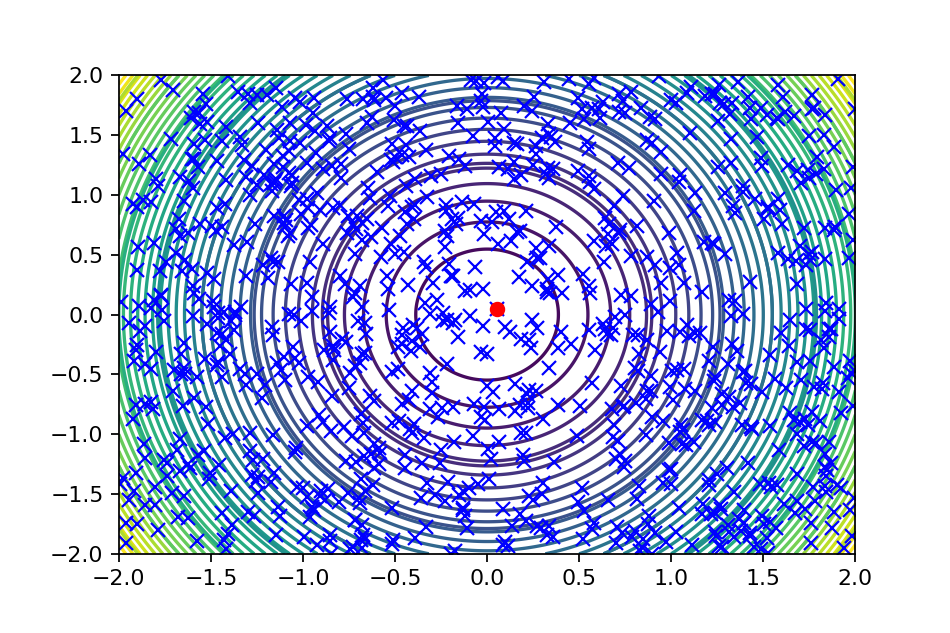

In [97]:
minimizeMC(1000)

Minimum at x: -0.005536527660256141 and y: 0.0370763350760841
Minimum function value: 0.0003589902249349067


<IPython.core.display.Javascript object>


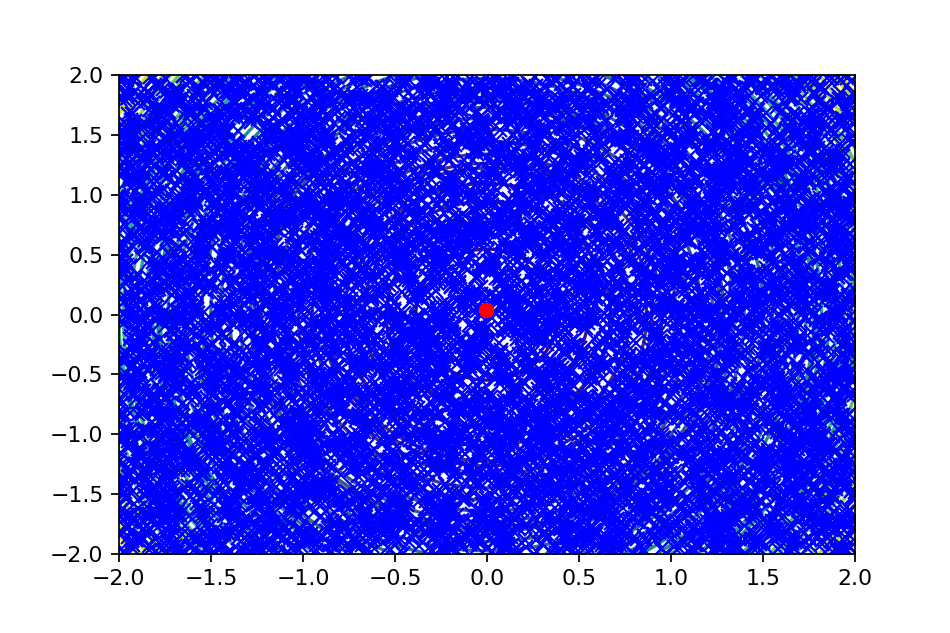

In [98]:
minimizeMC(10000)

### Minimization- Gradient Descent Method

Another method to calculate the minimum of a function is using the gradient descent method. In this method, we start with a point $x_{0}$ and gradually *descent* the slope until we reach the minimum function value. This can be calculated using:

$$ x_{n+1} = x_{n}-γ∇f(x_{n}) $$

where $∇f$ is the gradient and $γ$ is the step length. In order to calculate the minimum more efficiently, the value of the step length, $γ$, can be varied using the following equation:

$$ γ_{n}= \frac {(x_{n}- x_{n-1})[∇f(x_{n})-∇f(x_{n-1})]}{||∇f(x_{n})-∇f(x_{n})||^2} $$



In [102]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f1(xy):
    return ((xy[0]**2)/2) + ((xy[1]**2)/4) #define function

def f2(xy):
    return ((xy[0])**2/2)+ ((xy[1])**2)/3 - (xy[0]*xy[1])/4 #define function 

x_min,x_max= -2,2
y_min,y_max= -2,2 
def start_param(x_min, x_max, y_min, y_max): #set up initial values of x and y
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return [x0, y0]

In [103]:
def derivative(f,xy,d=.0000001): #define derivative function
    x,y= xy[0], xy[1]
    fx = (f([x+d/2,y])-f([x-d/2,y]))/d
    fy = (f([x,y+d/2])-f([x,y-d/2]))/d
    #print(fx,fy)
    return np.array([fx,fy])

def gradientDescent(f,x0, N=1000): 
    
    current_x= x0
    old_x= None
    converged= False #set to false initially
    x_list=[] #store all x, y values
    x_list.append(current_x)
    
    for i in range(N):
        current_df= derivative(f,current_x) #find derivative of current x,y
        
        if old_x is None:
            gamma=.01
        else: #use step length equation to calculate gamma
            old_df= derivative(f, old_x)
            deriv_diff= current_df- old_df
            numerator= np.dot(current_x-old_x, deriv_diff)
            denominator= (np.linalg.norm(deriv_diff))**2
            if denominator==0: #if denominator is zero, re-run the loop again
                continue
            gamma= numerator/denominator
        
        next_x= current_x- current_df*gamma
#         print(i)
        print ("Step:", f(current_x),f(next_x))
    
        if f(next_x) > f(current_x): 
            #print('converge') #once function converges, stop the loop
            coverged= True
            break
        
        else: #if it's still not converging, add the x, y values to the list of x,y
            #print('!converge')
            old_x= current_x
            current_x= next_x
            x_list.append(current_x)
            
    return converged, np.array(x_list), f(current_x)

Step: 0.5385787667185943 0.5288472748006613
Step: 0.5288472748006613 0.023585562557267854
Step: 0.023585562557267854 0.005496725625394006
Step: 0.005496725625394006 1.4139606670890522e-05
Step: 1.4139606670890522e-05 2.029643547495125e-07
Step: 2.029643547495125e-07 1.627904554174323e-07
Step: 1.627904554174323e-07 3.170380327731911e-16
Step: 3.170380327731911e-16 7.925616711781139e-17
Step: 7.925616711781139e-17 2.25178289563806e-24
Step: 2.25178289563806e-24 1.2652353172342988e-38
Step: 1.2652353172342988e-38 1.2652748605118964e-38
Minimum Function Value: 1.2652353172342988e-38 Number of Cycles: 11


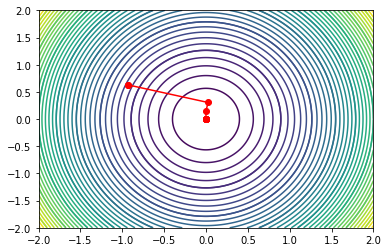

In [143]:
[x0,y0]= start_param(x_min,x_max,y_min,y_max)
converged, x_list, minimum_f= gradientDescent(f1, [x0,y0]) #run function


#graph using contour plots
nx = np.linspace(x_min,x_max,400)
ny = np.linspace(y_min,y_max,400)

x,y = np.meshgrid(nx,ny)
z=f1([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.08)
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)

plt.plot(x_list[:,0], x_list[:,1], 'ro-')
print("Minimum Function Value:", minimum_f, "Number of Cycles:", len(x_list))
# print(x_list[:,0],x_list[:,1])
plt.show()

# 16.6 Homework

- write a program to find the minimum of:
 
 $$ f_{2}(x,y)= \frac{x^2}{2} + \frac{y^2}{3} - \frac{xy}{4}$$
 
 1. from your own code (except Monte Carlo)
 2. from scipy

### 1. Gradient Descent Method 

Apply the same method (gradient descent method) from Homework 15.5 for function $f_{2}$

Step: 13.937572540155793 13.62871233143662
Step: 13.62871233143662 0.12514611036507234
Step: 0.12514611036507234 0.03485199560900673
Step: 0.03485199560900673 2.3096369177209634e-06
Step: 2.3096369177209634e-06 4.981512522783442e-09
Step: 4.981512522783442e-09 6.132810529985185e-09
Minimum Function Value: 4.981512522783442e-09 Number of Cycles: 6


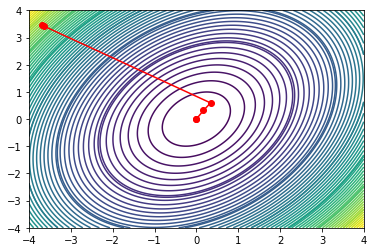

In [147]:
x_min, x_max= -4,4
y_min, y_max= -4,4
[x0,y0]= start_param(x_min,x_max,y_min,y_max)
converged, x_list, minimum_f= gradientDescent(f2, [x0,y0])

nx = np.linspace(x_min,x_max,400)
ny = np.linspace(y_min,y_max,400)

x,y = np.meshgrid(nx,ny)
z=f2([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)

plt.plot(x_list[:,0], x_list[:,1], 'ro-')
print("Minimum Function Value:", minimum_f, "Number of Cycles:", len(x_list))
# print(x_list[:,0],x_list[:,1])
plt.show()

### 2. From SciPy

Use built in SciPy optimization functions to calculate the minimum of $f_{2}$ and compare with the result found in part 1 using the gradient descent method. 

##### Nelder- Mead Method

In [148]:
from scipy.optimize import minimize

[x0, y0] = start_param(x_min, x_max, y_min, y_max)
res = minimize(f2, [x0,y0], method='nelder-mead', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 46
         Function evaluations: 87


##### Conjugent Gradient Method

In [149]:
res = minimize(f2, [x0,y0], method='CG', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 20
         Gradient evaluations: 5


#### Broyden- Fletcher- Goldfarb- Shanno (BFGS) Method

In [154]:
res = minimize(f2, [x0,y0], method='BFGS', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 32
         Gradient evaluations: 8


##### Powell's Method

In [155]:
res = minimize(f2, [x0,y0], method='powell', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 66


In the methods above, we can see the efficiency of each technique by the corresponding iteration values. Most of the methods found the minimum function value in less than 10 cycles, with the exception of the *Nelder-Mead* method (40+ cycles).  Looking at the minimum function values using the different optimization functions found in SciPy and our own gradient descent method, we can conclude that the minimum of the function $f_{2}$ is $0$. 